<a href="https://colab.research.google.com/github/MhammadRezaValiYari/StockMarket-Statistical-Analaysis/blob/main/music_data_statistical_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

data = yf.download('INTC', start='2024-1-1', end='2025-1-7')
df = pd.DataFrame(data)
df.head(4)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INTC,INTC,INTC,INTC,INTC
Date,,,,,
2024-01-02,47.168282,48.727402,46.822909,48.549781,45905700
2024-01-03,46.428196,47.178154,46.181500,46.477534,35858400
2024-01-04,46.250576,46.536744,44.642120,45.115776,47797800
2024-01-05,46.270309,47.197889,46.023613,46.408459,34332100


In [5]:
def clean_columns(df):
  if 'Date' in df.columns:
      df = df.set_index('Date')
  df.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]
  df.columns = [col.replace('INTC', ' ') for col in df.columns]
  if df.index.name == "Date":
      df = df.reset_index()

In [6]:
clean_columns(df)

In [7]:
df.head(2)

,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,47.168282,48.727402,46.822909,48.549781,45905700
2024-01-03,46.428196,47.178154,46.181500,46.477534,35858400


In [8]:
df.reset_index()

,Date,Close,High,Low,Open,Volume
0,2024-01-02,47.168282,48.727402,46.822909,48.549781,45905700
1,2024-01-03,46.428196,47.178154,46.181500,46.477534,35858400
2,2024-01-04,46.250576,46.536744,44.642120,45.115776,47797800
3,2024-01-05,46.270309,47.197889,46.023613,46.408459,34332100
4,2024-01-08,47.809696,48.115597,46.349256,46.447933,42135100
...,...,...,...,...,...,...
250,2024-12-30,19.820000,20.110001,19.730000,20.010000,59608100
251,2024-12-31,20.049999,20.400000,19.879999,19.990000,49846700
252,2025-01-02,20.219999,20.430000,20.000000,20.230000,46438500
253,2025-01-03,20.559999,20.670000,20.059999,20.389999,48983900


In [31]:
df = df.rename(columns={'Close  ': 'Close'})
df = df.rename(columns={'High  ': 'High'})
df = df.rename(columns={'Low  ': 'Low'})
df = df.rename(columns={'Open  ': 'Open'})
df = df.rename(columns={'Valume  ': 'Valume'})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2024-01-02 to 2025-01-06
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     255 non-null    float64
 1   High      255 non-null    float64
 2   Low       255 non-null    float64
 3   Open      255 non-null    float64
 4   Volume    255 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 12.0 KB


In [18]:
print(df.describe())

          Close        High         Low        Open        Volume  
count  255.000000  255.000000  255.000000  255.000000  2.550000e+02
mean    30.709610   31.230589   30.273893   30.798857  6.161055e+07
std      9.124566    9.211934    9.047763    9.147051  3.580468e+07
min     18.889999   19.110001   18.510000   18.969999  2.406570e+07
25%     22.384999   22.820000   22.010000   22.420000  3.987890e+07
50%     30.397173   30.739355   30.019567   30.357424  5.119300e+07
75%     39.616755   40.789521   39.547477   40.319425  6.962115e+07
max     48.895157   49.635245   48.322824   49.339211  3.008959e+08


In [19]:
df.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


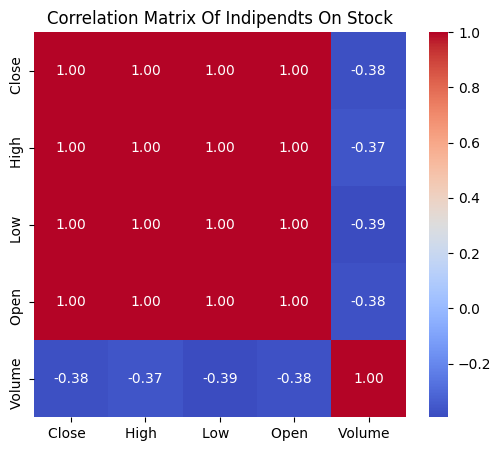

In [21]:
plt.figure(figsize=(6, 5))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Of Indipendts On Stock')
plt.show()

In [23]:
df.columns

Index(['Close  ', 'High  ', 'Low  ', 'Open  ', 'Volume  '], dtype='object')

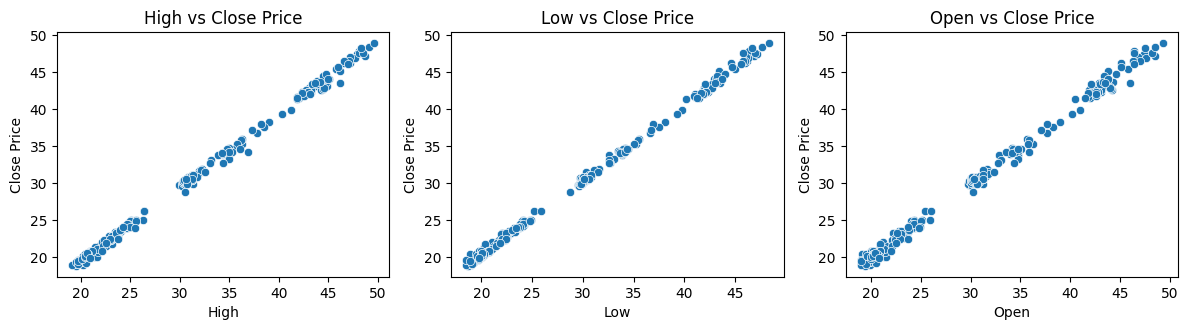

In [32]:
features = ['High', 'Low', 'Open']

y = df['Close']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
  plt.subplot(2,3,i)
  sns.scatterplot(x=df[feature], y=y)
  plt.title(f"{feature} vs Close Price")
  plt.xlabel(feature)
  plt.ylabel('Close Price')
plt.tight_layout()
plt.show()